# Logistic regression
---

The problem we are trying to solve is that the perceptron and adaline can't estimate the probability that a point belongs to a class.
In logistic regression we learn a family of functions $h$ from $\mathbb{R}^d$ to the interval $[0,1]$.
Logistic regression is used for classification tasks: we can interpret $h(x)$ as the *probability* that the label of $x$ is $1$.
The hypothesis class associated with logistic regression is the composition of a sigmoid function $\phi_{sig} : \mathbb{R} \rightarrow [0,1]$ over the class of linear functions $L_d$.
In particular, the sigmoid function used in logistic regression is the logistic function, defined as:
$$\phi_{sig}(z) = \frac{1}{1+e^{-z}}$$

Let's see how we can derive the sigmoid function:

### Odds
In a binary classification problem, let $p$ be the probability of the positive class.

The *odds* is defined as the ratio between the probability of the positive class and the probability of the negative class:

$$\frac{p}{1-p}$$

If we plot the odds ratio as a function of $p$ we obtain

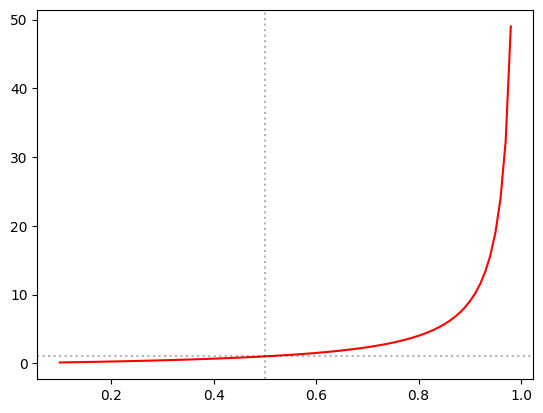

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# generating a range from 0.01 to 0.99 (not included) at steps of 0.01
p = np.arange(0.1, 0.99, 0.01)
# generating the values of the function
odds_ratio = p / (1 - p)

plt.plot(p, odds_ratio, color="r")
# plotting the dotted lines
plt.axvline(0.5, color="k", alpha=0.3, linestyle=":")
plt.axhline(1.0, color="k", alpha=0.3, linestyle=":")

### The logit function
If we define the $logit$ function as the logarithm of the odds (also called log-odds), we obtain:

$$logit(p) = log(\frac{p}{1-p})$$

This is a monotonic transformation of the logit function that maps a value in the range between $0$ and $1$ to $\mathbb{R}$, as shown in the following figure

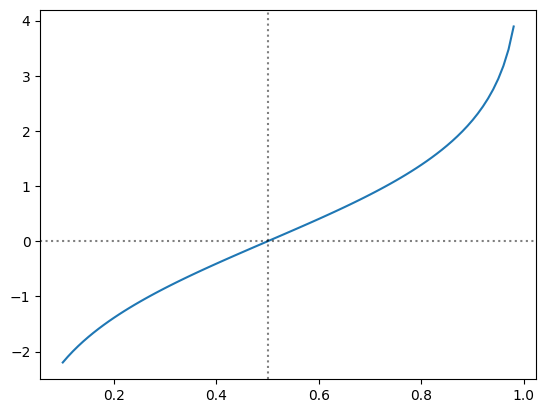

In [68]:
plt.plot(p, np.log(odds_ratio))

plt.axvline(0.5, color="k", alpha=0.5, linestyle=":")
plt.axhline(0.0, color="k", alpha=0.5, linestyle=":")

### Logistic sigmoid function
If $p$ is the probability that an object $x$ is classified in the positive class ($y = 1$), that is $p(y = 1 | x)$, we can use this to express a linear relationship between the logit function and the values of the input $x$:

$$logit(p(y = 1 | x)) = w_0 * x_0 + w_1 * x_1 + ... = w^t * x = z$$

Since we are actually interested in the probability $p(y = 1 | x)$ (and not its logit transformation), we can write the inverse of the logit function as

$$ z = log(p/(1-p)) \rightarrow e^z = p/(1-p) \rightarrow p = \frac{1}{1+e^{-z}}$$

We call this function of $z$, $\phi(z)$, the _**logistic sigmoid function**_:

$$ \phi(z) = 1/(1+e^{-z}) $$

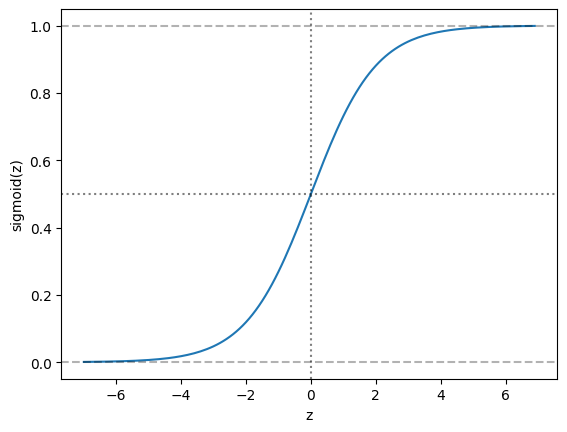

In [69]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


# from -7 to 7 at steps of 0.1
z = np.arange(-7, 7, 0.1)

phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color="k", alpha=0.5, linestyle=":")
plt.axhline(0.5, color="k", alpha=0.5, linestyle=":")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.axhline(1.0, color="k", alpha=0.3, linestyle="--")
plt.axhline(0.0, color="k", alpha=0.3, linestyle="--")

### Training with mini-batch logistic regression
If we plot the sigmoid function $\phi(z)$ at the output of a perceptron, $\phi(w^t x)$, we can obtain the probability that the object $x$ belongs to the positive class.

We can choose (remember the zero-one loss function) to assign the object to class $y = 1$ when $\phi(z)$ is greater than $0.5$ or, alternatively, when $z>0$.

How do we learn the parameters? Let's try with a 

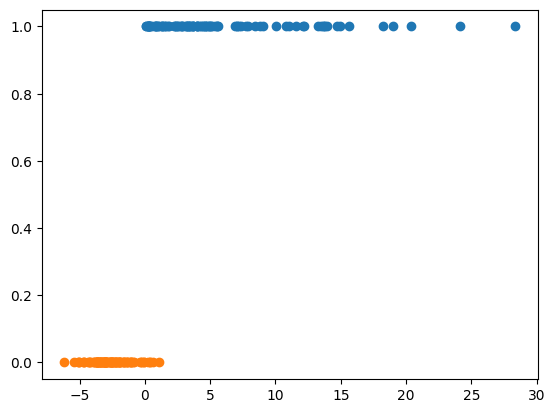

In [70]:
N = 100

# generate the first and second feature for the first class
X1_1 = np.random.exponential(scale=5.5, size=N)
X1_2 = np.random.normal(loc=-2.5, scale=1.5, size=N)

# set labels
Y1 = np.ones(N)
Y2 = np.zeros(N)

X = np.stack((np.ones(N * 2), np.concatenate((X1_1, X1_2))), axis=1)
Y = np.concatenate((Y1, Y2))

plt.scatter(X1_1, Y1)
plt.scatter(X1_2, Y2)

/var/folders/1b/5t27cfwx5ys8870_bck3jc840000gn/T/ipykernel_77098/3385683672.py:14: RuntimeWarning: divide by zero encountered in log
  cost = -Y.dot(np.log(logreg_output)) - ((1 - Y).dot(np.log(1 - logreg_output)))


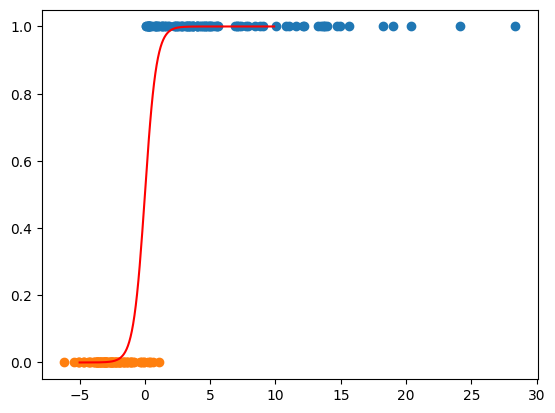

In [71]:
W = np.random.randn(2)

eta = 1e-2

batch_size = 4
max_epochs = 100

errors_epoch = np.zeros(max_epochs)

for epoch in range(max_epochs):
    logreg_output = sigmoid(np.dot(X, W))
    # compute the log loss
    # cost = -y * log(y_hat) - (1-y) * log(1-y_hat)
    cost = -Y.dot(np.log(logreg_output)) - ((1 - Y).dot(np.log(1 - logreg_output)))
    errors_epoch[epoch] = cost
    errors = Y - logreg_output

    rand_perm = np.random.permutation(range(Y.shape[0]))
    X = X[rand_perm, :]
    Y = Y[rand_perm]

    for j in range(0, Y.shape[0], batch_size):
        X_batch = X[j : (j + batch_size), :]
        Y_batch = Y[j : (j + batch_size)]
        logreg_output = sigmoid(np.dot(X_batch, W))
        errors = Y_batch - logreg_output
        W = W + eta * np.dot(X_batch.T, errors) / X_batch.shape[0]

plt.scatter(X1_1, Y1)
plt.scatter(X1_2, Y2)
zz = np.arange(-5, 10, 0.1)
xx = np.stack((np.ones(len(zz)), zz), axis=1)
plt.plot(zz, sigmoid(np.dot(xx, W)), c="red")

### Plot the number of errors per epoch

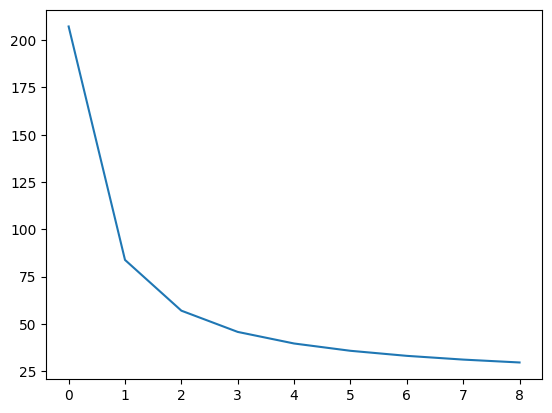

In [72]:
plt.plot(range(max_epochs), errors_epoch)